# alternative calibration of chessboards using opencv

based on:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html


In [9]:
import glob
import numpy as np
import cv2
from cv2 import aruco

import os

import json

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

%matplotlib notebook


charuco_square_length = 140.0 / 1000 # chessboard square side length (normally in meters)
charuco_marker_length = 88.0 / 1000 # marker side length (same unit than squareLength)
squaresX = 5
squaresY = 7

dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250)
board = cv2.aruco.CharucoBoard_create(squaresX,squaresY,charuco_square_length,charuco_marker_length,dictionary)


#mpl.rcParams['figure.figsize'] = [12, 8]

#%matplotlib nbagg
print("opencv version",cv2.__version__)

opencv version 3.4.1


In [2]:
images = glob.glob("calibration_boards/intrinsics/18284512/*.jpg")
images.sort()
images_base_name = []

print("{} image files found".format(len(images))) 
for i in range(len(images)):
    _, tail = os.path.split(images[i])
    print(tail)
    images_base_name.append(tail)
    

15 image files found
capture_11.jpg
capture_12.jpg
capture_14.jpg
capture_15.jpg
capture_16.jpg
capture_17.jpg
capture_18.jpg
capture_20.jpg
capture_21.jpg
capture_22.jpg
capture_23.jpg
capture_24.jpg
capture_25.jpg
capture_5.jpg
capture_6.jpg


image shape: (1024, 1280, 3)


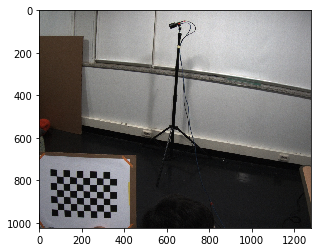

In [3]:
i = 0
figure1 = plt.figure()
img = cv2.imread(images[i])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),  interpolation = "nearest")
print("image shape: {}".format(img.shape))

imsize = (img.shape[0], img.shape[1])

In [4]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# board 
board_width = 9
board_height = 6
board_shape = (board_width, board_height)
square_size = 40.0 / 1000.0

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
#objp = np.zeros((board_width*board_height,3), np.float32)
#objp[:,:2] = np.mgrid[0:board_width*square_size:square_size,0:board_height*square_size:square_size].T.reshape(-1,2)

objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
img2 = []
for fname in images:
    
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        img2.append(fname)
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

images = img2
#print(len(img2))
print(board_shape, ret)        
        

(9, 6) True


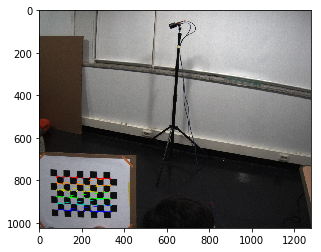

In [5]:
i = 0
img = cv2.imread(images[i])
img = cv2.drawChessboardCorners(img, board_shape, imgpoints[i],ret)
plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),  interpolation = "nearest")



ret 0.1962571294015394
[[2.71175504e+03 0.00000000e+00 6.80694697e+02]
 [0.00000000e+00 2.69040536e+03 5.99537588e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-1.01176077 -1.5349476  -0.02715202 -0.03455433 21.63374294]]
1024 1280
[[2.42917163e+03 0.00000000e+00 6.59522683e+02]
 [0.00000000e+00 2.38203711e+03 5.88986020e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
(23, 39, 1222, 942)


(-0.5, 1279.5, 1023.5, -0.5)

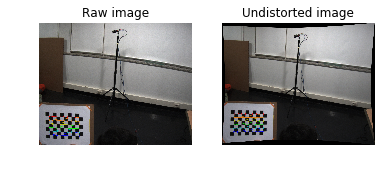

In [6]:
shape = gray.shape[::-1]

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, shape,None,None)

print("ret {}".format(ret))
print(mtx)
print(dist)


gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
h,  w = gray.shape[:2]
print(h,w)


newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

print(newcameramtx)


# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
print(roi)
#dst = dst[y:y+h, x:x+w]

#plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB),  interpolation = "nearest")

plt.figure()
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Raw image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title("Undistorted image")
plt.axis("off")


(-0.5, 1279.5, 1023.5, -0.5)

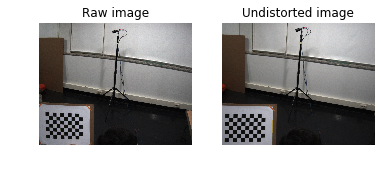

In [7]:

intrinsics = mtx
dist_coeffs = dist

i = 0
plt.figure()
img = cv2.imread(images[i])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_undist = cv2.undistort(img,intrinsics,dist_coeffs,None)
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Raw image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(img_undist)
plt.title("Undistorted image")
plt.axis("off")

0 error: 0.040111509926107736
error: 0.0026741006617405157


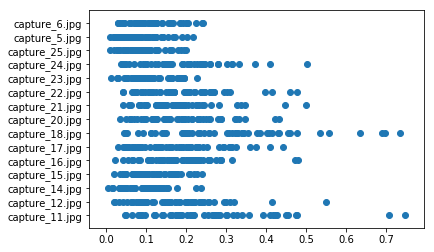

In [8]:
tot_error = 0
for n in range(1): # len(objpoints)):
    
    img2, _ = cv2.projectPoints(objpoints[n], rvecs[n], tvecs[n], mtx, dist)
    error = cv2.norm(imgpoints[n], img2, cv2.NORM_L2) 
    tot_error += error/len(img2)
    print("{} error: {}".format(n, error/len(img2)) )
print("error: {}".format(tot_error/len(objpoints)) )

x = []
y = []
for n in range(len(objpoints)):
    img2, _ = cv2.projectPoints(objpoints[n], rvecs[n], tvecs[n], mtx, dist)
    for m in range(len(img2)):
        delta = img2[m] - imgpoints[n][m]
        d = np.linalg.norm(delta)
        #x.append( delta[0][0] )
        #y.append( delta[0][1] )
        
        x.append(d)
        y.append(n)
        #print(delta,x,y)

        
        
plt.figure()


plt.yticks(np.arange(len(images)), images_base_name)

plt.scatter(x, y)





In [ ]:
now test with charuco board


In [12]:
def find_charuco_board(img, board, dictionary):
    corner_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.00001)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, dictionary)    
    if len(corners)>0:
        for corner in corners:
            cv2.cornerSubPix(gray, corner, winSize=(3,3), zeroZone=(-1,-1), criteria=corner_criteria)        
        ret, detectedCorners, detectedIds = cv2.aruco.interpolateCornersCharuco(corners,ids,gray,board)
        if detectedCorners is not None and detectedIds is not None and len(detectedCorners)>3:
            return detectedCorners, detectedIds
    return [], []
        

position (tvec) [[-0.15689625]
 [ 0.29072176]
 [ 5.40242579]] 
rotation matrix 3x3 from rvec) {}  [[ 0.83524032  0.02421816  0.54935152]
 [-0.1548435  -0.94824442  0.27722917]
 [ 0.5276335  -0.31661649 -0.78826195]]


<IPython.core.display.Javascript object>


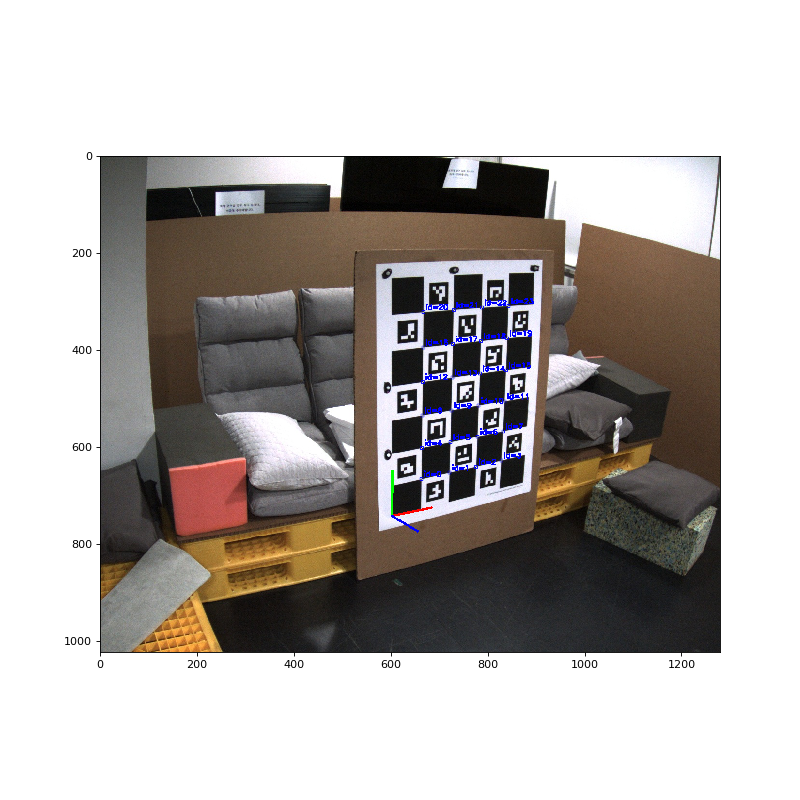

In [19]:
i = 1
test_img = cv2.imread("sample-data/18284512/capture_2.jpg")



corners2, ids2 = find_charuco_board(test_img, board, dictionary)
img = cv2.aruco.drawDetectedCornersCharuco(test_img, corners2, ids2)

valid, rvec, tvec = cv2.aruco.estimatePoseCharucoBoard(corners2, ids2, board, intrinsics, dist_coeffs)

print("position (tvec) {} ".format(tvec))

# calculate the rotation matrix from the rvec    
rot3x3, _ = cv2.Rodrigues(rvec)
print("rotation matrix 3x3 from rvec) {} ",format(rot3x3))

a = {}
a["rot3x3"] = rot3x3.tolist()

cv2.aruco.drawAxis(img, intrinsics, dist_coeffs, rvec, tvec, 0.2) 

plt.figure(figsize=(10, 10), dpi= 80)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),  interpolation = "nearest")


